THANKS TO MINUTE PHYSICS @ YOUTUBE

In [3]:
import my_tools as mt
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df_cases_new = mt.read_csv('cases_daily', 'New cases')
df_cases_total = mt.read_csv('cases_total','Total cases')
df_cases_weekly = mt.read_csv('cases_weekly', 'New cases weekly')

df_deaths_new = mt.read_csv('deaths_daily', 'New deaths')
df_deaths_total = mt.read_csv('deaths_total', 'Total deaths')
df_deaths_weekly = mt.read_csv('deaths_weekly', 'New deaths weekly')

df_prevalence = mt.read_csv('prevalence', 'Prevalence')
df_incidence_daily = mt.read_csv('incidence_daily', 'Incidence daily')
df_incidence_weekly = mt.read_csv('incidence_weekly', 'Incidence weekly')
df_mortality = mt.read_csv('mortality', 'Mortality')

df_global = mt.read_csv('global', 'Global data')

df_thresholds = pd.read_csv('data/thresholds.csv').set_index('ind')

today = datetime.date.today() - datetime.timedelta(days=1)

countries = df_cases_new.columns
dates = df_cases_new.index
weekly_dates = df_cases_weekly.index

In [2]:
def create_table(countries=[]):
    if countries == []:
        countries = df_cases_new.columns
    
    ind = [[],[]]
    dict_data = {}
    
    daily = []
    weekly = []
    total = []
    
    prevalence = []
    incidence_daily = []
    incidence_weekly = []
    mortality = []
    
    for country in countries:
        ind[0].append(country)
        ind[0].append(country)
        
        ind[1].append('Cases')
        ind[1].append('Deaths')
        
        daily.append(df_cases_new[country].values[-1])
        daily.append(df_deaths_new[country].values[-1])
        
        weekly.append(df_cases_weekly[country].values[-1])
        weekly.append(df_deaths_weekly[country].values[-1])
        
        total.append(df_cases_total[country].values[-1])
        total.append(df_deaths_total[country].values[-1])
        
        prevalence.append(df_prevalence[country].values[-1])
        prevalence.append(0)
        
        incidence_daily.append(df_incidence_daily[country].values[-1])
        incidence_daily.append(0)
        
        incidence_weekly.append(df_incidence_weekly[country].values[-1])
        incidence_weekly.append(0)
        
        mortality.append(0)
        mortality.append(df_mortality[country].values[-1])
    
    dict_data['Daily'] = daily
    dict_data['Weekly'] = weekly
    dict_data['Total'] = total
    
    dict_data['Prevalence'] = prevalence
    dict_data['Incidence daily'] = incidence_daily
    dict_data['Incidence weekly'] = incidence_weekly
    dict_data['Mortality'] = mortality
    
    df = pd.DataFrame(dict_data, index=ind)
        
    return df

In [9]:
countries_of_interest = ['Belgium']


def get_highlights_mask(df):
    mask = df.copy()
    mask.loc[:,:] = 'color: black'

    mask.loc[df['Prevalence'] > 0.001, ['Prevalence']] = 'color: red'
    mask.loc[df['Incidence daily'] > 0.0001, ['Incidence daily']] = 'color: red'
    mask.loc[df['Incidence weekly'] > 0.0005, ['Incidence weekly']] = 'color: red'
    mask.loc[df['Mortality'] > 0.05, ['Mortality']] = 'color: red'

    return mask    

def show_perc(df):
    col = ['Prevalence', 'Incidence daily', 'Incidence weekly', 'Mortality']
    for c in col:
        x = df[c]
        df = df.astype({c: 'str'})

        for ind in df.index:
            perc = f'{x[ind] * 100 : 9.3f}%'
            df.at[ind, c] = perc
    
    return df
    
def show_table(countries):
    table = create_table(countries)
    mask = get_highlights_mask(table)
    table = show_perc(table)
    table.style.applymap(mask, axis=None)
    
    display(table)
    


show_table(countries_of_interest)

Daily  Weekly  Total  Prevalence Incidence daily  \
Belgium Cases     876    8498  12775      0.112%          0.008%   
        Deaths    192     438    705      0.000%          0.000%   

               Incidence weekly   Mortality  
Belgium Cases            0.074%      0.000%  
        Deaths           0.000%      5.519%

In [6]:
display(table)
display(mask)

NameError: name 'table' is not defined

In [143]:
table.style.applymap(mask, axis=None)

TypeError: the first argument must be callable

In [7]:
y = mt.threshold_data(df_cases_weekly, 'cases', 'daily')
x = mt.threshold_data(df_cases_total, 'cases', 'weekly')

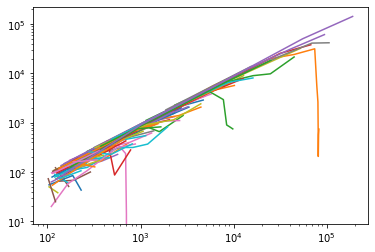

In [12]:
plt.plot(x, y)
plt.yscale('log')
plt.xscale('log')
plt.show()